# Change green background

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load images and show images
image = cv.imread('images/green_background.png')
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

background = cv.imread('images/normal_background.png')
rgb_background = cv.cvtColor(background, cv.COLOR_BGR2RGB)

cv.imshow('green background', image)
cv.imshow('normal backround', background)
cv.waitKey(0)
cv.destroyAllWindows()

### Resizing images

In [4]:
# dimensions of both images

rgb_image.shape, rgb_background.shape

((370, 700, 3), (393, 700, 3))

In [5]:
# Let's give the image we'll use as background the same size as the image with green backround

rgb_background = cv.resize(rgb_background, (rgb_image.shape[1], rgb_image.shape[0]))
rgb_background.shape

(370, 700, 3)

### Removing green background

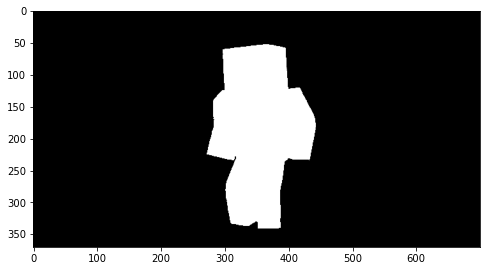

In [6]:
# create mask
image_hsv = cv.cvtColor(rgb_image, cv.COLOR_RGB2HSV)
lower_bound = (45, 100, 20)
upper_bound = (80, 255, 255)
mask = cv.inRange(image_hsv, lower_bound, upper_bound)
mask = cv.bitwise_not(mask)

plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='gray')

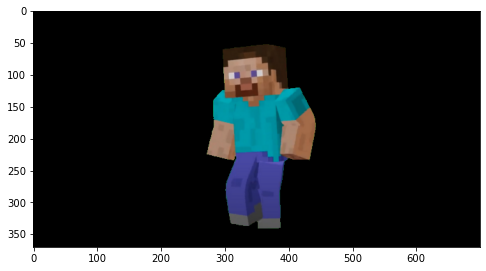

In [7]:
# Filtered out the image without green
removed_green = cv.bitwise_and(rgb_image, rgb_image, mask=mask)
plt.figure(figsize=(8, 6))
plt.imshow(removed_green)

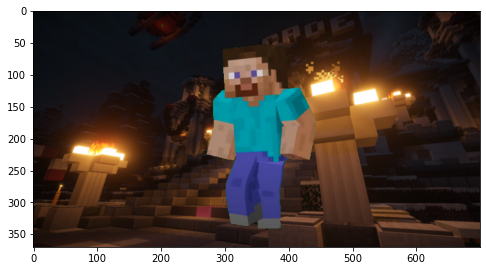

In [8]:
# replace black background with choosen background

removed_green[mask == 0] = rgb_background[mask == 0]
plt.figure(figsize=(8, 6))
plt.imshow(removed_green)
